# seaborn可视化(3) — 分布
类型	|函数	|说明
--|:--:|--:
单变量|	distplot(data)|	灵活地绘制观测值的单变量分布
单变量|kdeplot(x,y,data)	|拟合并绘制单变量或双变量核密度估计值
单变量|rugplot(x,y,data)	|将数组中的数据点绘制为轴上的标尺
二元|	jointplot(x,y,data)	|用双变量图和单变量图绘制一个由两个变量组成的图
成对|	pairplot(data)	|将点估计和置信区间显示为矩形条

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set(font = 'SimHei')
sns.set(font_scale=1.5)
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


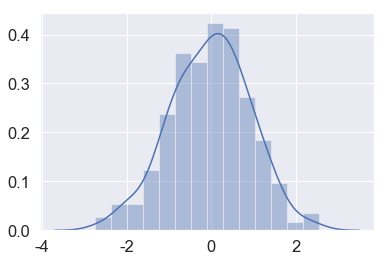

In [3]:
"""
要快速查看seaborn中的单变量分布，最方便的方法是distplot()函数。
默认情况下，这将绘制直方图并符合内核密度估计(KDE)
Signature:
sns.distplot(
    ['a', 'bins=None', 'hist=True', 'kde=True', 'rug=False', 'fit=None',
    'hist_kws=None', 'kde_kws=None', 'rug_kws=None', 'fit_kws=None',
    'color=None', 'vertical=False', 'norm_hist=False', 'axlabel=None',
    'label=None', 'ax=None'],)
"""
x = np.random.normal(size=300)
sns.distplot(x)

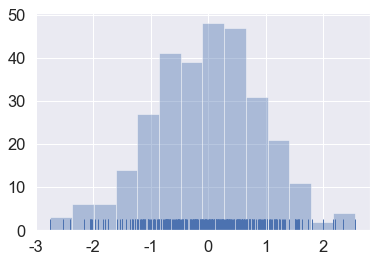

In [4]:
#rug = True  --> rugplot():将数组中的数据点绘制为轴上的标尺
sns.distplot(x,kde = False,rug = True)

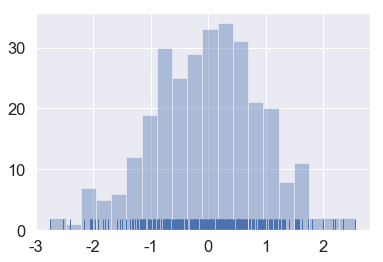

In [5]:
#bins
sns.distplot(x, bins=20, kde=False, rug=True)


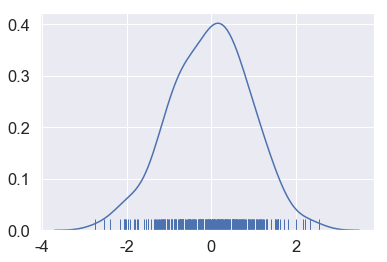

In [6]:
#hist 
sns.distplot(x, hist=False, rug=True)

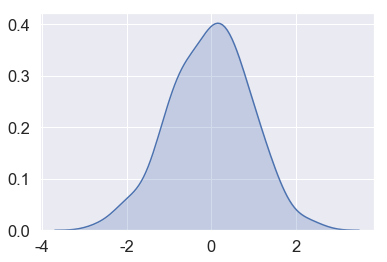

In [7]:
"""
Signature:
sns.kdeplot(
    ['data', 'data2=None', 'shade=False', 'vertical=False',"kernel='gau'", 
    "bw='scott'", 'gridsize=100', 'cut=3', 'clip=None', 'legend=True',
    'cumulative=False', 'shade_lowest=True', 'cbar=False',
    'cbar_ax=None', 'cbar_kws=None', 'ax=None', '**kwargs'],)
说明：拟合并绘制单变量或双变量核密度估计值 
"""
#kdeplot() shade
sns.kdeplot(x, shade=True)

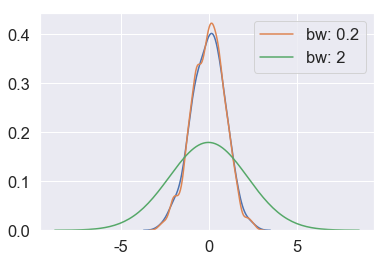

In [8]:
#bw 
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

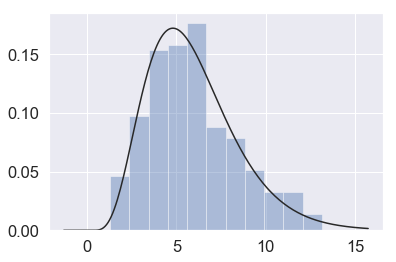

In [9]:
#拟合参数分布
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)


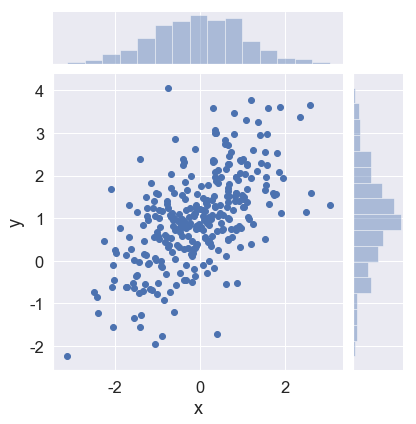

In [10]:
#二元分布
"""
用双变量图和单变量图绘制一个由两个变量组成的图
Signature:
sns.jointplot(
    ['x', 'y', 'data=None', "kind='scatter'", 'stat_func=None', 'color=None',
    'height=6', 'ratio=5', 'space=0.2', 'dropna=True', 'xlim=None', 
    'ylim=None', 'joint_kws=None', 'marginal_kws=None', 'annot_kws=None',
    '**kwargs'],)
"""

#散点图
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 300)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x = "x",y = "y",data = df)

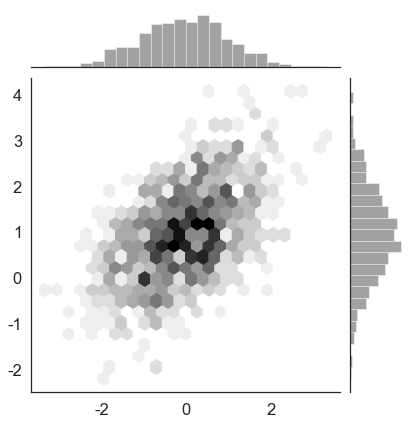

In [11]:
#六边形图
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

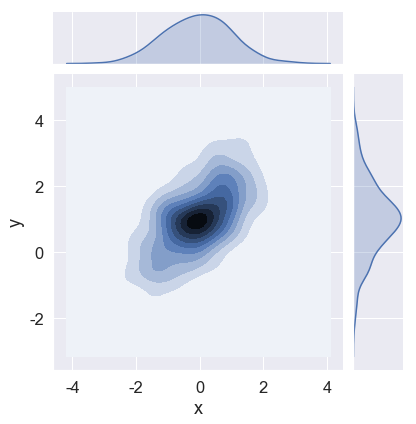

In [12]:
#kde
sns.jointplot(x="x", y="y", data=df, kind="kde")


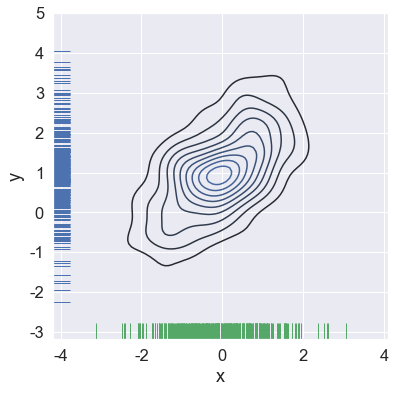

In [13]:
#kde+rug
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

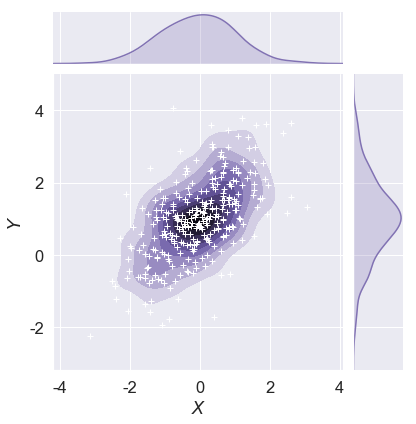

In [14]:
#多层次
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

In [15]:
"""
要在数据集中绘制多个成对的二元分布，可以使用pairplot()函数。
这将创建一个轴矩阵，并显示数据aframe中每对列的关系。
默认情况下，它还绘制了每个变量在对角线轴上的单变量分布:
pairplot() :在数据集中绘制成对关系
Signature:
sns.pairplot(
    ['data', 'hue=None', 'hue_order=None', 'palette=None', 'vars=None',
    'x_vars=None', 'y_vars=None', "kind='scatter'", "diag_kind='auto'", 
    'markers=None', 'height=2.5', 'aspect=1', 'dropna=True', 'plot_kws=None',
    'diag_kws=None', 'grid_kws=None', 'size=None'],)
"""
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


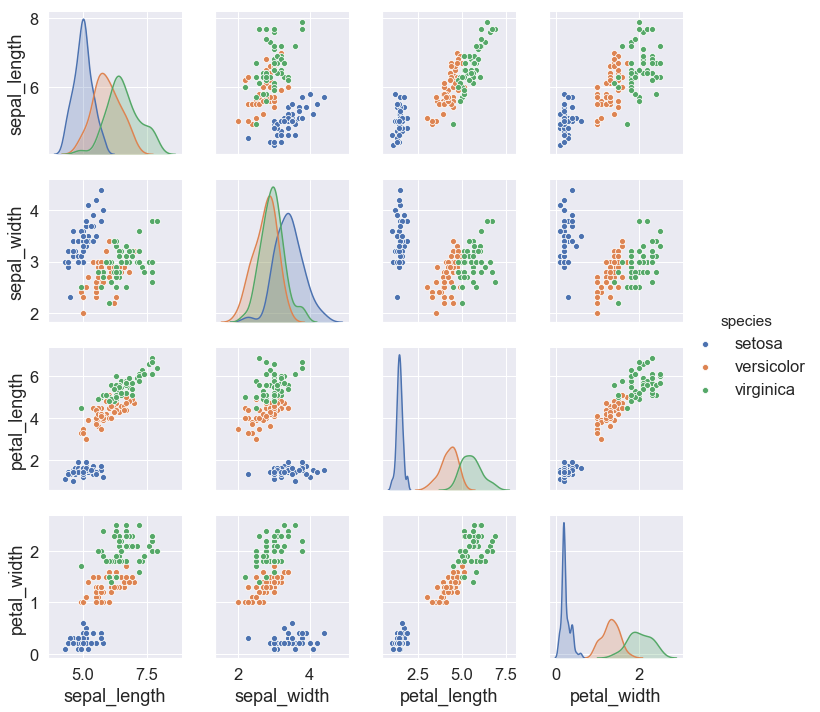

In [17]:
#在数据集中绘制多个成对的二元分布
sns.pairplot(iris,hue = 'species')

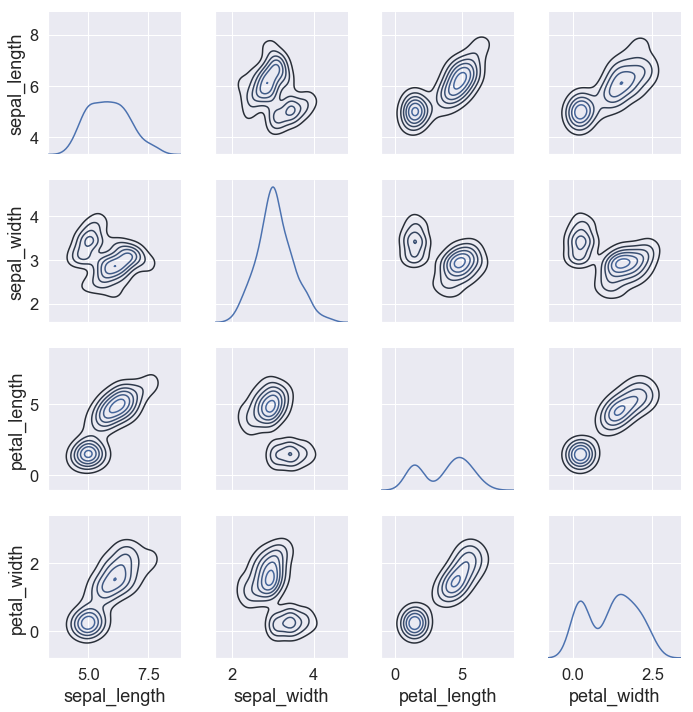

In [18]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)